In [1]:
import decode_eeg
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [22]:
time_window = 50
time_step = 25
trial_average = 20
n_splits = 50
group_dict = {0:ss1,1:ss3}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [23]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    xdata,ydata = xdata[::2],ydata[::2]

    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8


Saving output\figures\accfeat_mix.pdf
Saving output\figures\accfeat_mix.png


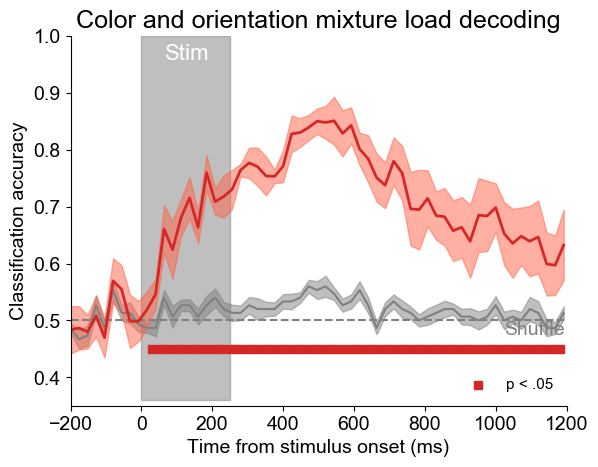

Significant timepoints: [  40   64   88  112  136  160  184  208  232  256  280  304  328  352
  376  400  424  448  472  496  520  544  568  592  616  640  664  688
  712  736  760  784  808  832  856  880  904  928  952  976 1000 1024
 1048 1072 1096 1120 1144 1168 1192]
Mean delay accuracy: 0.7301481481481481
Mean delay S.D.: 0.07551146135263458


In [24]:
interp = decode_eeg.Interpreter(clfr)
interp.labels = [1,2]
interp.plot_acc(significance_testing=True,savefig=True, ylim=[0.35,1],chance_text_y=.23, title='Color and orientation mixture load decoding',subtitle='feat_mix')